Validacion de susbsitemas y variables

In [4]:
import pandas as pd

# Define el path del archivo
file_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_consolidated_data.xlsx"

# Input 1: Seleccionar el tipo de subsistema
subsistemas = [
    "Subestaciones Eléctricas",
    "Sistemas de Energía",
    "Calidad en Producción",
    "Confiabilidad de Activos"
]

print("Seleccione el tipo de subsistema a analizar:")
for i, subsistema in enumerate(subsistemas):
    print(f"{i + 1}. {subsistema}")

# Validar la selección del usuario
try:
    seleccion = int(input("Ingrese el número correspondiente al subsistema: "))
    if 1 <= seleccion <= len(subsistemas):
        subsistema_seleccionado = subsistemas[seleccion - 1]
        print(f"Subsistema seleccionado: {subsistema_seleccionado}")
    else:
        raise ValueError
except ValueError:
    raise ValueError("Selección no válida. Por favor, ingrese un número válido.")

# Input 2: Solicitar las columnas que se desea validar
print("\nIngrese las columnas que desea validar, separadas por comas (pueden estar entre comillas o sin ellas):")
columns_input = input(
    "Por ejemplo: 'Tensión: L1 (V)', \"Tensión: L2 (V)\", Tensión: L3 (V), timestamp\n"
)

# Limpiar los nombres de las columnas ingresadas
columns_to_validate = [
    col.strip().strip('"').strip("'") for col in columns_input.split(",")
]

# Cargar el dataset
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Validar las columnas ingresadas
missing_columns = [col for col in columns_to_validate if col not in data.columns]
if missing_columns:
    raise ValueError(f"Las siguientes columnas no se encuentran en el dataset: {missing_columns}")

print("\nValidación completada: Todas las columnas ingresadas están presentes en el dataset.")

# Mostrar información básica del dataset (opcional, puede eliminarse si no es necesario)
print("\nInformación del dataset cargado:")
print(data.info())


Seleccione el tipo de subsistema a analizar:
1. Subestaciones Eléctricas
2. Sistemas de Energía
3. Calidad en Producción
4. Confiabilidad de Activos


Subsistema seleccionado: Subestaciones Eléctricas

Ingrese las columnas que desea validar, separadas por comas (pueden estar entre comillas o sin ellas):

Validación completada: Todas las columnas ingresadas están presentes en el dataset.

Información del dataset cargado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 92 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tensión: L1 (V)                    7141 non-null   float64       
 1   Tensión: L2 (V)                    7141 non-null   float64       
 2   Tensión: L3 (V)                    7141 non-null   float64       
 3   Tensión: L1 - L2 (V)               7141 non-null   float64       
 4   Tensión: L2 - L3 (V)               7141 non-null   float64       
 5   Tensión: L3 - L1 (V)               7141 non-null   float64       
 6   timestamp                          7141 non-nul

carga, normalización y preparación de los datos para el clustering

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# Define el path de tu archivo
file_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_consolidated_data.xlsx"

# Cargar los datos
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Inspección básica
print("Información del dataset:")
print(data.info())

# Selección de variables numéricas para normalización
numeric_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Normalización (Z-score normalization)
scaler = StandardScaler()
data_normalized = data.copy()
data_normalized[numeric_vars] = scaler.fit_transform(data[numeric_vars])

# Guardar los datos normalizados en un nuevo archivo para futuras etapas
output_path = os.path.join(
    os.path.dirname(file_path), "normalized_data.xlsx"
)
data_normalized.to_excel(output_path, index=False)

print(f"Datos normalizados guardados en: {output_path}")


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 92 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tensión: L1 (V)                    7141 non-null   float64       
 1   Tensión: L2 (V)                    7141 non-null   float64       
 2   Tensión: L3 (V)                    7141 non-null   float64       
 3   Tensión: L1 - L2 (V)               7141 non-null   float64       
 4   Tensión: L2 - L3 (V)               7141 non-null   float64       
 5   Tensión: L3 - L1 (V)               7141 non-null   float64       
 6   timestamp                          7141 non-null   datetime64[ns]
 7   Corriente: L1 (A)                  7141 non-null   float64       
 8   Corriente: L2 (A)                  7141 non-null   float64       
 9   Corriente: L3 (A)                  7141 non-null   float64       
 10  Factor de p

Código para Clustering y #optimo de clusters 

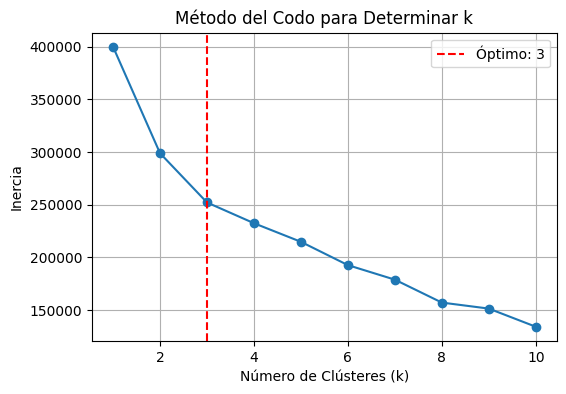

Número óptimo de clústeres identificado: 3
Clustering completado con 3 clústeres.
Datos con clústeres guardados en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx


In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from kneed import KneeLocator

# Paso 1: Cargar los datos normalizados
normalized_data_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data.xlsx"
data_normalized = pd.read_excel(normalized_data_path)

# Seleccionar variables numéricas
numeric_vars = data_normalized.select_dtypes(include=['float64', 'int64']).columns
X = data_normalized[numeric_vars]

# Paso 2: Calcular inercia para diferentes números de clústeres
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Paso 3: Determinar el número óptimo de clústeres utilizando KneeLocator
knee_locator = KneeLocator(cluster_range, inertia, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Gráfica del Método del Codo
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Óptimo: {optimal_clusters}')
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Determinar k")
plt.legend()
plt.grid()
plt.show()

# Paso 4: Realizar clustering con el número óptimo de clústeres
print(f"Número óptimo de clústeres identificado: {optimal_clusters}")
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_normalized['Cluster'] = kmeans.fit_predict(X)

# Guardar los datos con clústeres
output_path_with_clusters = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
data_normalized.to_excel(output_path_with_clusters, index=False)

print(f"Clustering completado con {optimal_clusters} clústeres.")
print(f"Datos con clústeres guardados en: {output_path_with_clusters}")


Distribución de los Clústeres y Visualización

Distribución de muestras por Clúster:
   Cluster  Cantidad de Muestras
0        0                  1385
1        1                  3165
2        2                  2591
Distribución de clústeres guardada en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/cluster_distribution.xlsx


/tmp/ipykernel_168051/1721579144.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Cantidad de Muestras', data=cluster_counts_df, palette='viridis')


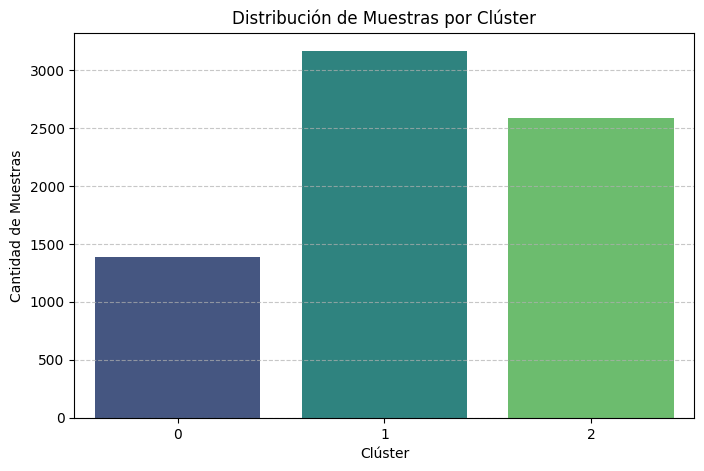

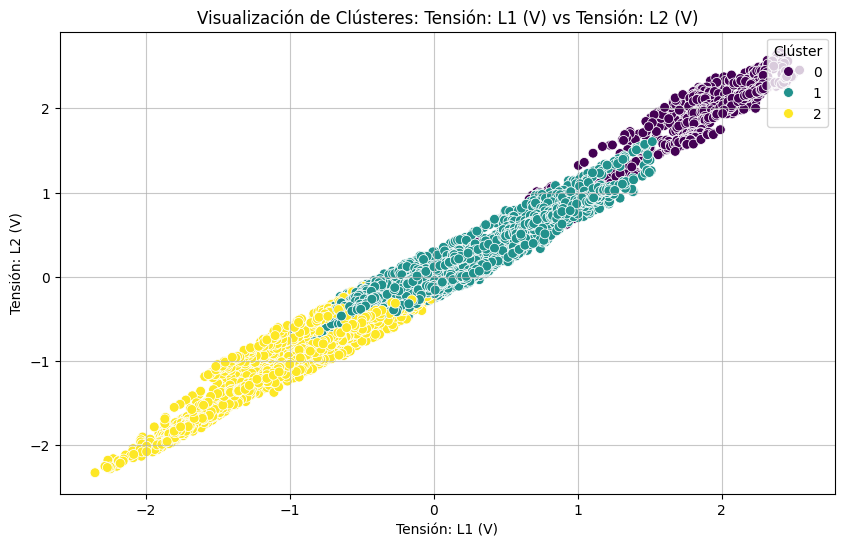

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos con clústeres
data_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
data_with_clusters = pd.read_excel(data_with_clusters_path)

# Paso 1: Generar la tabla de distribución de clústeres
cluster_counts = data_with_clusters['Cluster'].value_counts().sort_index()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Cantidad de Muestras']

print("Distribución de muestras por Clúster:")
print(cluster_counts_df)

# Guardar la distribución en un archivo
cluster_distribution_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/cluster_distribution.xlsx"
cluster_counts_df.to_excel(cluster_distribution_path, index=False)
print(f"Distribución de clústeres guardada en: {cluster_distribution_path}")

# Paso 2: Visualización de la distribución de clústeres
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Cantidad de Muestras', data=cluster_counts_df, palette='viridis')
plt.title("Distribución de Muestras por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Muestras")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Paso 3: Visualización de clústeres en el espacio
# Seleccionar variables clave para la visualización
var_x = 'Tensión: L1 (V)'  # Cambiar a una variable clave de interés
var_y = 'Tensión: L2 (V)'  # Cambiar a una variable clave de interés

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=var_x, y=var_y, hue='Cluster', data=data_with_clusters, palette='viridis', s=50
)
plt.title(f"Visualización de Clústeres: {var_x} vs {var_y}")
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.legend(title="Clúster", loc='upper right')
plt.grid(alpha=0.7)
plt.show()


Análisis de Varianza y Correlación

In [8]:
import pandas as pd
import numpy as np
import os

# Cargar los datos con la columna 'Cluster'
data_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
data_with_clusters = pd.read_excel(data_with_clusters_path)

# Verificar que la columna 'Cluster' exista
if 'Cluster' not in data_with_clusters.columns:
    raise KeyError("La columna 'Cluster' no está presente en los datos. Verifica el paso previo.")

# Seleccionar columnas numéricas
numeric_columns = data_with_clusters.select_dtypes(include=[np.number]).columns

# Paso 1: Calcular la varianza dentro de cada clúster
cluster_variance = {}
for cluster in data_with_clusters['Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster][numeric_columns]
    var_by_cluster = cluster_data.var()
    cluster_variance[cluster] = var_by_cluster

# Convertir el diccionario a un DataFrame para facilitar la visualización
cluster_variance_df = pd.DataFrame(cluster_variance)
cluster_variance_df['Mean_Variance'] = cluster_variance_df.mean(axis=1)
important_variables_by_variance = cluster_variance_df['Mean_Variance'].sort_values(ascending=False)

# Paso 2: Calcular la correlación con la columna 'Cluster'
# Convertir 'Cluster' a numérico para el cálculo de correlación
data_with_clusters['Cluster_numeric'] = data_with_clusters['Cluster'].astype(float)

# Crear lista de columnas numéricas junto con 'Cluster_numeric'
numeric_columns_with_cluster = numeric_columns.tolist() + ['Cluster_numeric']

# Calcular la matriz de correlación completa
correlation_matrix = data_with_clusters[numeric_columns_with_cluster].corr()

# Extraer las correlaciones con 'Cluster_numeric'
correlations = correlation_matrix['Cluster_numeric'].drop(labels=['Cluster_numeric']).sort_values(ascending=False)

# Paso 3: Crear un DataFrame final con los resultados
analysis_results = pd.DataFrame({
    'Variable': important_variables_by_variance.index,
    'Mean_Variance': important_variables_by_variance.values,
    'Correlation_with_Cluster': correlations.reindex(important_variables_by_variance.index, fill_value=np.nan)
})

# Agregar información del clúster a las variables
cluster_importance = data_with_clusters.groupby('Cluster')[numeric_columns].mean().transpose()
analysis_results = analysis_results.merge(cluster_importance, left_on='Variable', right_index=True, how='left')

# Paso 4: Exportar el DataFrame a un archivo Excel
output_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/analysis_results_with_clusters.xlsx"
analysis_results.to_excel(output_path, index=False)

print(f"Archivo Excel generado: {output_path}")
print("\nVariables ordenadas por importancia (varianza media) y correlación con el clúster:")
print(analysis_results)


Archivo Excel generado: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/analysis_results_with_clusters.xlsx

Variables ordenadas por importancia (varianza media) y correlación con el clúster:
                                                            Variable  \
Factor de potencia: L2 +                    Factor de potencia: L2 +   
Armónicos IL2: Armónico 11 (%IL2)  Armónicos IL2: Armónico 11 (%IL2)   
Factor de potencia: L3 +                    Factor de potencia: L3 +   
Factor de potencia: L1 +                    Factor de potencia: L1 +   
Armónicos VL3: Armónico 2 (%VL3)    Armónicos VL3: Armónico 2 (%VL3)   
...                                                              ...   
Armónicos VL3: Armónico 10 (%VL3)  Armónicos VL3: Armónico 10 (%VL3)   
Armónicos VL3: Armónico 12 (%VL3)  Armónicos VL3: Armónico 12 (%VL3)   
Armónicos VL3: Armónico 14 (%VL3)  Armónicos VL3: Armónico 14 (%VL3)   
Armónicos VL3: Armónico 15 (%VL3)  Armónicos VL3: Armónico 15 (%VL3)   
Cluster 

Selección Automática de Variables

In [9]:
import pandas as pd
import numpy as np

# Ruta correcta del archivo proporcionado
analysis_results_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/analysis_results_with_clusters.xlsx"

# Leer los resultados del análisis
analysis_results = pd.read_excel(analysis_results_path)

# Definir umbrales dinámicos para la selección de variableselección Automática de Variables
variance_threshold = analysis_results['Mean_Variance'].mean()  # Promedio de varianza como umbral
correlation_threshold = 0.3  # Umbral fijo para la correlación con los clústeres (positivo o negativo)

# Seleccionar variables que cumplan con ambos criterios
selected_variables = analysis_results[
    (analysis_results['Mean_Variance'] > variance_threshold) &
    (analysis_results['Correlation_with_Cluster'].abs() > correlation_threshold)
]

# Verificar si hay variables seleccionadas
if selected_variables.empty:
    print("No se encontraron variables que cumplan con los criterios establecidos.")
else:
    # Exportar las variables seleccionadas a un nuevo archivo
    selected_variables_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables.xlsx"
    selected_variables.to_excel(selected_variables_path, index=False)
    print(f"Variables seleccionadas guardadas en: {selected_variables_path}")
    print("\nVariables seleccionadas:")
    print(selected_variables[['Variable', 'Mean_Variance', 'Correlation_with_Cluster']])


Variables seleccionadas guardadas en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables.xlsx

Variables seleccionadas:
                             Variable  Mean_Variance  Correlation_with_Cluster
6    Armónicos VL2: Armónico 3 (%VL2)       0.922000                 -0.526458
7   Armónicos VL2: Armónico 13 (%VL2)       0.917469                 -0.416441
8             Flicker (Pst): L1 (Pst)       0.900439                 -0.315479
21   Armónicos IL1: Armónico 2 (%IL1)       0.692942                  0.397402
24   Armónicos IL2: Armónico 7 (%IL2)       0.652869                  0.359310
26  Armónicos VL1: Armónico 11 (%VL1)       0.520880                 -0.431416
28   Armónicos IL1: Armónico 3 (%IL1)       0.497698                  0.421635
29                  Corriente: L3 (A)       0.483335                  0.557592
30  Distorsión armónica: IL1 (%I THD)       0.480705                  0.410165
31   Armónicos IL1: Armónico 7 (%IL1)       0.480282              

Detección de Anomalías en Variables Seleccionadas

In [12]:
# Crear archivos necesarios para centroides históricos y umbral histórico
import json
import pandas as pd
import numpy as np

# Ruta de los datos con clústeres
data_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
data_with_clusters = pd.read_excel(data_with_clusters_path)

# Ruta de las variables seleccionadas
selected_variables_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables.xlsx"
selected_variables = pd.read_excel(selected_variables_path)['Variable'].tolist()

# Validar que las variables seleccionadas estén en el dataset
missing_vars = [var for var in selected_variables if var not in data_with_clusters.columns]
if missing_vars:
    raise ValueError(f"Las siguientes variables seleccionadas no están en el dataset: {missing_vars}")

# Filtrar el dataset con las variables seleccionadas
filtered_data = data_with_clusters[selected_variables + ['Cluster']].copy()

# Rutas para los archivos históricos
historical_centers_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/historical_cluster_centers.xlsx"
historical_threshold_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/historical_threshold.json"

# Generar archivo de centroides históricos si no existe
if not os.path.exists(historical_centers_path):
    cluster_centers = filtered_data.groupby('Cluster')[selected_variables].mean()
    cluster_centers.to_excel(historical_centers_path, index_label='Cluster')
    print(f"Archivo de centroides históricos generado en: {historical_centers_path}")

# Generar archivo de umbral histórico si no existe
if not os.path.exists(historical_threshold_path):
    current_threshold = np.percentile(filtered_data['Cluster'], 95)
    with open(historical_threshold_path, 'w') as f:
        json.dump({'threshold': current_threshold}, f)
    print(f"Archivo de umbral histórico generado en: {historical_threshold_path}")


Archivo de centroides históricos generado en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/historical_cluster_centers.xlsx
Archivo de umbral histórico generado en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/historical_threshold.json


Objetivo del Código
El código tiene como objetivo preparar los archivos necesarios para manejar de manera incremental y dinámica los datos que se procesarán en el análisis. Esto es crucial porque:

El dataset es dinámico: Se espera que los datos crezcan a través de un flujo de ETL o acumulación manual.
Persistencia: Los archivos permiten conservar información clave (como centroides y umbrales) para garantizar la continuidad en el análisis, sin necesidad de recalcular todo desde cero.
Optimización: Ayuda a evitar reprocesar datos históricos, enfocándose en los nuevos datos que ingresen.

¿Por Qué Creamos Cada Archivo?
1. historical_centers_path
Propósito: Este archivo almacena los centroides históricos de los clústeres, que son los puntos promedio de cada clúster en el espacio definido por las variables seleccionadas.

¿Qué representa?

Cada clúster tiene un centroide calculado como el promedio de las variables seleccionadas para todas las muestras asignadas a ese clúster.
Estos centroides representan la estructura general de los clústeres y son necesarios para calcular distancias de nuevas muestras en futuros análisis.
Uso:

Cuando se añadan nuevos datos, los centroides históricos se combinan con los centroides calculados en los datos nuevos para mantener consistencia y reflejar cambios acumulativos en los datos.
Ventajas:

Asegura que el análisis sea consistente a lo largo del tiempo.
Reduce la necesidad de recalcular centroides para todo el dataset en cada ejecución.

2. historical_threshold_path
Propósito: Este archivo almacena el umbral histórico que define qué tan lejos puede estar una muestra de su centroide antes de considerarse una anomalía.
¿Qué representa?
El umbral se calcula inicialmente como el percentil 95 de las distancias de las muestras al centroide, lo que indica que las muestras más alejadas del centroide (el 5% más extremo) se consideran anomalías.
Este umbral puede ser ajustado dinámicamente cuando se procesen nuevos datos.
Uso:
Al añadir nuevos datos, se calcula un nuevo umbral con base en las distancias actuales, y este valor se combina con el umbral histórico para adaptarse al comportamiento acumulativo de los datos.
Ventajas:
Permite detectar anomalías de manera consistente, incluso cuando los datos cambian con el tiempo.
Evita que el análisis sea sensible únicamente a los datos más recientes.


Filtrado del Dataset con Variables Seleccionadas

In [15]:
import pandas as pd
import os

# Rutas de los archivos
normalized_data_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
selected_variables_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables.xlsx"
filtered_data_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_data_for_anomalies.xlsx"

# Cargar los datos normalizados y las variables seleccionadas
normalized_data = pd.read_excel(normalized_data_path)
selected_variables = pd.read_excel(selected_variables_path)['Variable'].tolist()

# Verificar que la columna `Cluster` exista
if 'Cluster' not in normalized_data.columns:
    raise KeyError("La columna 'Cluster' no está presente en los datos normalizados. Verifica el paso previo.")

# Validar que las variables seleccionadas estén en el dataset
missing_vars = [var for var in selected_variables if var not in normalized_data.columns]
if missing_vars:
    raise ValueError(f"Las siguientes variables seleccionadas no están en el dataset normalizado: {missing_vars}")

# Filtrar el dataset con las variables seleccionadas
filtered_data = normalized_data[selected_variables + ['Cluster']]

# Guardar el dataset filtrado
filtered_data.to_excel(filtered_data_path, index=False)
print(f"Dataset filtrado guardado en: {filtered_data_path}")


Dataset filtrado guardado en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_data_for_anomalies.xlsx


Análisis de Anomalías en el Dataset Filtrado con umbral dinamico

In [17]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import json

# Rutas de los archivos
filtered_data_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_data_for_anomalies.xlsx"
historical_centers_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/historical_cluster_centers.xlsx"
historical_threshold_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/historical_threshold.json"
output_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/data_with_anomalies_filtered.xlsx"

# Cargar el dataset filtrado
filtered_data = pd.read_excel(filtered_data_path)

# Cargar los centroides históricos
centroides = pd.read_excel(historical_centers_path).set_index('Cluster')

# Calcular las distancias al centroide
distances = cdist(filtered_data.drop(columns=['Cluster']), centroides, metric='euclidean')
filtered_data['Distance_to_Centroid'] = np.min(distances, axis=1)

# Calcular un nuevo umbral dinámico basado en el percentil 98 de las distancias al centroide
new_threshold = np.percentile(filtered_data['Distance_to_Centroid'], 98)

# Guardar el nuevo umbral dinámico en el archivo JSON
with open(historical_threshold_path, 'w') as f:
    json.dump({'threshold': new_threshold}, f)

print(f"Nuevo umbral dinámico calculado: {new_threshold}")

# Detectar anomalías con el nuevo umbral
filtered_data['Anomaly'] = filtered_data['Distance_to_Centroid'] > new_threshold

# Guardar los resultados con anomalías marcadas
filtered_data.to_excel(output_path, index=False)

print(f"Análisis completado. Dataset con anomalías guardado en: {output_path}")
print(f"Total de anomalías detectadas: {filtered_data['Anomaly'].sum()}")


Nuevo umbral dinámico calculado: 4.625087031484471
Análisis completado. Dataset con anomalías guardado en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/data_with_anomalies_filtered.xlsx
Total de anomalías detectadas: 143


el umbral se considera dinámico en este contexto porque:

Se calcula en cada ejecución del código con base en los datos actuales, específicamente la distribución de las distancias al centroide en el dataset cargado.
Aunque usamos un percentil fijo (el 98% en este caso), el valor resultante del umbral varía según los datos actuales. Por lo tanto, el umbral no es un valor fijo predefinido como en el archivo historical_threshold.json inicial.

El percentil 98 se usa como criterio para determinar el valor del umbral dinámico.
En cada ejecución, el percentil se recalcula en función de las distancias actuales, haciendo que el análisis sea adaptativo.


Análisis y Visualización de Anomalías

In [18]:
import pandas as pd

# Ruta del archivo con anomalías detectadas
anomalies_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/data_with_anomalies_filtered.xlsx"

# Cargar los datos con anomalías
anomalies_data = pd.read_excel(anomalies_path)

# Separar anomalías y no anomalías
anomalies = anomalies_data[anomalies_data['Anomaly'] == True]
normal_data = anomalies_data[anomalies_data['Anomaly'] == False]

# Análisis descriptivo
print("Estadísticas descriptivas de las anomalías:")
print(anomalies.describe())

print("\nDistribución de los clústeres para las anomalías:")
print(anomalies['Cluster'].value_counts())


Estadísticas descriptivas de las anomalías:
       Armónicos VL2: Armónico 3 (%VL2)  Armónicos VL2: Armónico 13 (%VL2)  \
count                        143.000000                         143.000000   
mean                          -0.084002                           3.111495   
std                            1.421222                           1.357153   
min                           -0.332028                          -0.473644   
25%                           -0.332028                           1.794829   
50%                           -0.332028                           4.063302   
75%                           -0.332028                           4.063302   
max                           10.308257                           4.063302   

       Flicker (Pst): L1 (Pst)  Armónicos IL1: Armónico 2 (%IL1)  \
count               143.000000                        143.000000   
mean                  0.759086                         -0.985000   
std                   1.453902                   

Visualización de la Distribución de las Distancias

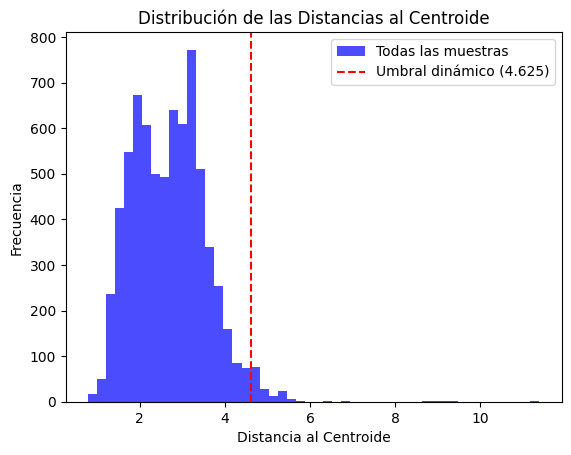

In [19]:
import matplotlib.pyplot as plt

# Histograma de las distancias al centroide
plt.hist(anomalies_data['Distance_to_Centroid'], bins=50, color='blue', alpha=0.7, label='Todas las muestras')
plt.axvline(x=4.625, color='red', linestyle='--', label='Umbral dinámico (4.625)')
plt.title("Distribución de las Distancias al Centroide")
plt.xlabel("Distancia al Centroide")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


 Visualización de Anomalías por Clúster

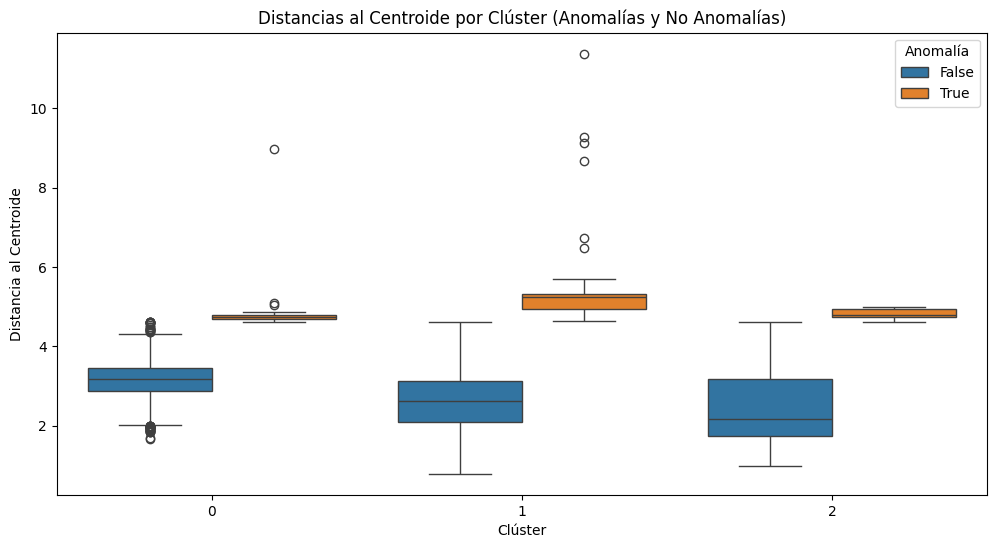

In [20]:
import seaborn as sns

# Visualización de las anomalías por clúster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Distance_to_Centroid', data=anomalies_data, hue='Anomaly')
plt.title("Distancias al Centroide por Clúster (Anomalías y No Anomalías)")
plt.xlabel("Clúster")
plt.ylabel("Distancia al Centroide")
plt.legend(title="Anomalía", loc='upper right')
plt.show()


Crear y Evaluar el Modelo

Dataset Etiquetado

In [22]:
# Añadir una columna de etiqueta binaria para el modelo (1 = Anomalía, 0 = Normal)
anomalies_data['Label'] = anomalies_data['Anomaly'].astype(int)

# Guardar el dataset etiquetado
labeled_data_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/labeled_data_for_modeling.xlsx"
anomalies_data.to_excel(labeled_data_path, index=False)

print(f"Dataset etiquetado guardado en: {labeled_data_path}")


Dataset etiquetado guardado en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/labeled_data_for_modeling.xlsx


Preparar los Datos

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ruta del archivo con datos etiquetados
labeled_data_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/labeled_data_for_modeling.xlsx"

# Cargar los datos etiquetados
data = pd.read_excel(labeled_data_path)

# Separar características (X) y etiquetas (y)
X = data.drop(columns=['Anomaly', 'Label'])  # Usar todas las columnas excepto las etiquetas
y = data['Label']  # Etiqueta binaria: 1 = Anomalía, 0 = Normal

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (5712, 17)
Tamaño del conjunto de prueba: (1429, 17)


Entrenar un Modelo Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

print("Entrenamiento del modelo completado.")


Entrenamiento del modelo completado.


Evaluar el Modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1400
           1       1.00      0.97      0.98        29

    accuracy                           1.00      1429
   macro avg       1.00      0.98      0.99      1429
weighted avg       1.00      1.00      1.00      1429

AUC-ROC: 1.00


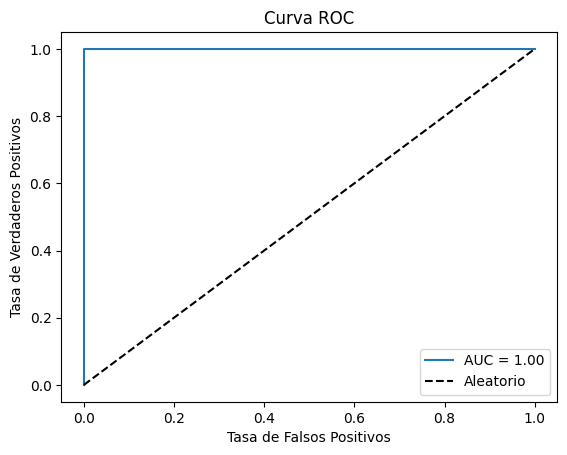

In [25]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicciones
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva (anomalía)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_score:.2f}")

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()


Guardar el Modelo Entrenado

In [26]:
import joblib

# Guardar el modelo en un archivo
model_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/random_forest_model.pkl"
joblib.dump(rf_model, model_path)

print(f"Modelo entrenado guardado en: {model_path}")


Modelo entrenado guardado en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/random_forest_model.pkl


Validación Cruzada y Comparación de Modelos

Configuración General

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Configurar validación cruzada (Stratified K-Fold para respetar el desbalance de clases)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir la métrica de evaluación
scorer = make_scorer(roc_auc_score, needs_proba=True)


/home/elicoubuntu/Desktop/Industrial_Insigths/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Modelos a Probar

In [28]:
# Inicializar los modelos
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Evaluar cada modelo
results = {}

for name, model in models.items():
    print(f"Evaluando {name}...")
    scores = cross_val_score(model, X, y, cv=skf, scoring=scorer)
    results[name] = scores
    print(f"AUC-ROC promedio para {name}: {scores.mean():.4f} ± {scores.std():.4f}")


Evaluando Random Forest...
AUC-ROC promedio para Random Forest: 1.0000 ± 0.0000
Evaluando Logistic Regression...
AUC-ROC promedio para Logistic Regression: 0.9997 ± 0.0002
Evaluando Gradient Boosting...
AUC-ROC promedio para Gradient Boosting: 0.9931 ± 0.0138
Evaluando SVM...
AUC-ROC promedio para SVM: 0.9993 ± 0.0007


Comparación de Resultados

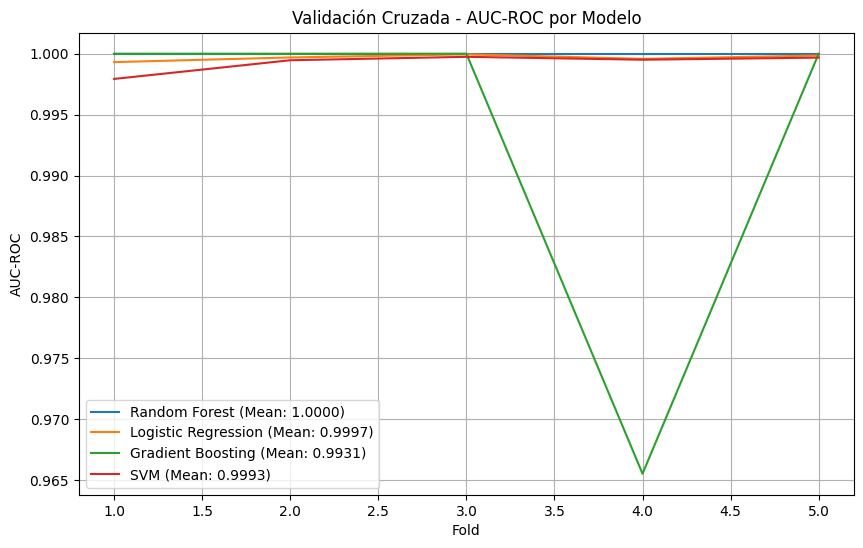

In [29]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(10, 6))

for name, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, label=f"{name} (Mean: {scores.mean():.4f})")

plt.title("Validación Cruzada - AUC-ROC por Modelo")
plt.xlabel("Fold")
plt.ylabel("AUC-ROC")
plt.legend()
plt.grid()
plt.show()


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Modelos a evaluar
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Resultados de validación cruzada
cv_results = {}

# Validación cruzada con 10 folds
for name, model in models.items():
    print(f"Evaluando {name}...")
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')  # Usamos 'accuracy' como métrica básica
    cv_results[name] = {"mean": scores.mean(), "std": scores.std()}
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


Evaluando Random Forest...
Random Forest: Mean Accuracy = 0.9978, Std = 0.0054
Evaluando Logistic Regression...
Logistic Regression: Mean Accuracy = 0.9860, Std = 0.0217
Evaluando Gradient Boosting...
Gradient Boosting: Mean Accuracy = 0.9999, Std = 0.0004
Evaluando SVM...
SVM: Mean Accuracy = 0.9737, Std = 0.0450
